# Sales Analysis

### Importando Bibliotecas Importantes

In [17]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

### Carregando os dados

In [2]:
INPUT = "./Sales_Data"
files = [file for file in os.listdir(INPUT) if not file.startswith('.')] # Ignore hidden files

all_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(INPUT+"/"+file)
    all_data = pd.concat([all_data, current_data])
    
all_data.to_csv("all_data.csv", index=False)

'''
INPUT = "./Sales_Data/Sales_{}_2019.csv"
df1 = pd.read_csv(INPUT.format("January"))
...
df12 = df1 = pd.read_csv(INPUT.format("December"))

all_data = pd.concat([df1,df2,...,df12])
all_data.to_csv("all_data.csv", index=False)
'''

'\nINPUT = "./Sales_Data/Sales_{}_2019.csv"\ndf1 = pd.read_csv(INPUT.format("January"))\n...\ndf12 = df1 = pd.read_csv(INPUT.format("December"))\n\nall_data = pd.concat([df1,df2,...,df12])\nall_data.to_csv("all_data.csv", index=False)\n'

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head(n=10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
5,248156,34in Ultrawide Monitor,1,379.99,09/13/19 14:59,"469 12th St, Los Angeles, CA 90001"
6,248157,Lightning Charging Cable,1,14.95,09/07/19 09:59,"773 Johnson St, Portland, ME 04101"
7,248158,Lightning Charging Cable,1,14.95,09/02/19 14:16,"682 Sunset St, Los Angeles, CA 90001"
8,248159,Vareebadd Phone,1,400.0,09/06/19 16:45,"664 Wilson St, New York City, NY 10001"
9,248160,Wired Headphones,1,11.99,09/01/19 22:03,"446 9th St, San Francisco, CA 94016"


### Limpando a base de dados 

#### Solucionando o problema "invalid literal for int() with base 10: 'Or'"

In [5]:
all_data = all_data[all_data['Order Date'].str[:2] != "Or"]

#### Dropping NAN

In [13]:
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')

### Adicionando Colunas

In [6]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


In [12]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Profit'] = all_data['Price Each'] * all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Profit
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


In [53]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2][1:3]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Profit,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin (TX)
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...
186845,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301",7,11.99,Atlanta (GA)
186846,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016",7,109.99,San Francisco (CA)
186847,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001",7,2.99,Dallas (TX)
186848,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301",7,11.99,Austin (TX)


### Q1: What was the best month for sales? How much was earned that month?

#### Best Month for sales

In [26]:
#Mostra os meses em ordem decrescente de lucro
#results = all_data.groupby(by=["Month"]).sum().sort_values(by=["Profit"],ascending=False)]
results = all_data.groupby(by=["Month"]).sum()

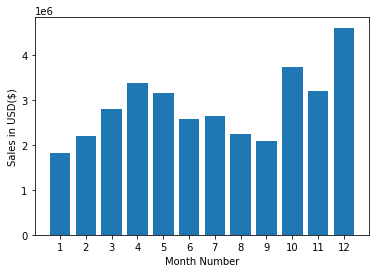

In [30]:
months = range(1,13)
plt.bar(months, results['Profit'])
plt.xlabel('Month Number')
plt.ylabel('Sales in USD($)')
plt.xticks(months)
plt.show()

#Baseado no gráfico podemos pensar que em épocas festivas 
#tais como Natal,Ano Novo, entre outras, resultam em aumento das vendas
#e em épocas de férias em que o investimento costuma ser no ramo de viagem
#os lucros sofrem quedas como esperado 

### Q2: What city sold the most product? 

In [54]:
bs_city = all_data.groupby(by=["City"]).sum()
bs_city

,Quantity Ordered,Price Each,Month,Profit
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


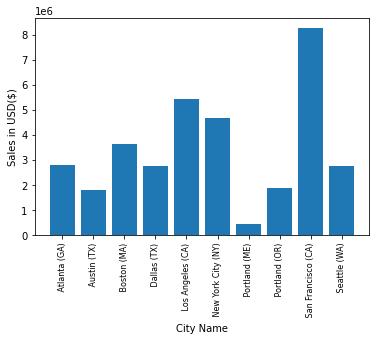

In [61]:
cities = [city for city, df in all_data.groupby(by=["City"])]
plt.bar(cities, bs_city['Profit'])
plt.xlabel('City Name')
plt.ylabel('Sales in USD($)')
plt.xticks(cities, rotation='vertical',size=8)
plt.show()

#Com base nesse gráfico podemos perceber uma grande divergência em áreas de vendas como New York em média e Portland
#com baixa, sendo assim, pode-se ser viável uma análise a fim de compreender a origem da divergência
#Por que San Francisco tem uma venda fora da média?

### Q3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [62]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Profit,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin (TX)
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...
186845,236665,Wired Headphones,1,11.99,2019-07-20 16:16:00,"694 Meadow St, Atlanta, GA 30301",7,11.99,Atlanta (GA)
186846,236666,20in Monitor,1,109.99,2019-07-31 20:11:00,"866 14th St, San Francisco, CA 94016",7,109.99,San Francisco (CA)
186847,236667,AAA Batteries (4-pack),1,2.99,2019-07-17 22:29:00,"249 Cherry St, Dallas, TX 75001",7,2.99,Dallas (TX)
186848,236668,Wired Headphones,1,11.99,2019-07-30 19:28:00,"727 Wilson St, Austin, TX 73301",7,11.99,Austin (TX)


In [84]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

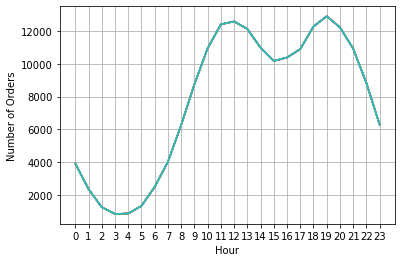

In [94]:
hours = [hour for hour, df in all_data.groupby(by=["Hour"])]
plt.plot(hours, all_data.groupby(by=["Hour"]).count())
plt.xlabel('Hour')
plt.grid()
plt.ylabel('Number of Orders')
plt.xticks(hours)
plt.show()

### Q4: What products are most often sold together?

#### Produtos diferentes com mesmo local e mesma data

In [109]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-109-9004901cd214>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [110]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


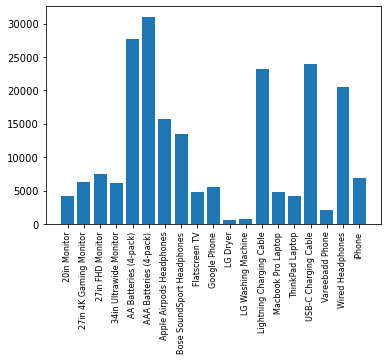

In [111]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

### Q5:What product sold the most? Why do you think it sold the most?

In [114]:
prod_gp = all_data.groupby("Product").sum()

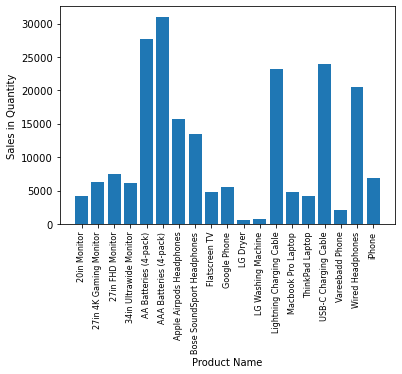

In [119]:
qtd = prod_gp['Quantity Ordered']

products = [product for product, df in all_data.groupby(by=["Product"])]
prices = all_data.groupby('Product').mean()['Price Each']



plt.bar(products, qtd)
plt.xlabel('Product Name')
plt.ylabel('Sales in Quantity')
plt.xticks(products, rotation='vertical',size=8)
plt.show()


<ipython-input-120-453e22375345>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-120-453e22375345>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


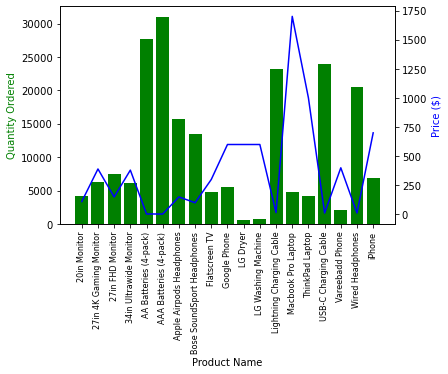

In [120]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()